# Lesson 3: The Toolbox

Now that we’ve established that an image is essentially a matrix, we’re ready to dive deeper into how we can work with this matrix. Just like a skilled card player needs the right cards to win a game, we need the right tools to manipulate these matrices and extract valuable insights from them.

In this third course, we’ll be expanding our toolbox, equipping ourselves with more advanced techniques to modify, enhance, and transform images. By learning how to skillfully manipulate the matrices behind the images, we gain the ability to adjust brightness, contrast, detect edges, and much more. Each tool adds a new layer of control, allowing us to shape and modify images to suit our needs.

So, let’s explore these powerful tools and learn how to play our cards to their **full potential**.

## Convolution
There are several operations to manipulate images, one of the most popular is the convolution operation. As a reminder, the convolution operation for a __discrete__ signal is defined as: $$[f*g](n)=\sum _{i=-inf}^{+inf} f(i) g(n-i)=\sum _{i=-inf}^{+inf} g(i) f(n-i)$$

In the case of an image, the signal is in 2 dimensions and the formula is rewritten as:
$$[f*g](m,n)=\sum _{i=-inf}^{+inf}\sum _{j=-inf}^{+inf} f(i,j) g(m-i,n-j)=\sum _{i=-inf}^{+inf} g(i,j) f(m-i,n-j)$$

Here, f represents the image that will undergo the operation and g is the so-called __kernel__.

In practice, this mathematical formula is quite simple, as shown in the following image:

![SegmentLocal](./images/3D_Convolution_Animation.gif "segment")

The kernel is a window that slides over each pixel of the image f. The new pixel obtained is a linear combination of the old pixel and its close neighbors (depending on the dimension of the kernel). The coefficients of the linear combination are the kernel g. When the image is a _grayscale_ image, the operation only needs to be done once, but when it is an RGB image, the operation needs to be applied to each _channel_.

There are some constraints on the kernels used: the dimension of the kernel must be odd and smaller than that of the image (for example 3x3) and we normalize the coefficients of the kernel so that their sum is 0,1 or -1. We also have to decide what happens on the edges, 3 possibilities: duplicate the pixels on the edges to apply the convolution (see image), set these coefficients to 0 or do not convolve on the edges. 

The first use of this convolution operation is the __convolution filter__.


## Convolution Filter
We will implement the convolution operation and test the convolution filter with different kernels to see the results.

In [6]:
# First the imports
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# This library is uselfull for all image related manipulations. "OpenCV" or shortyly written cv.
import cv2

Let's have some fun with Merkel !

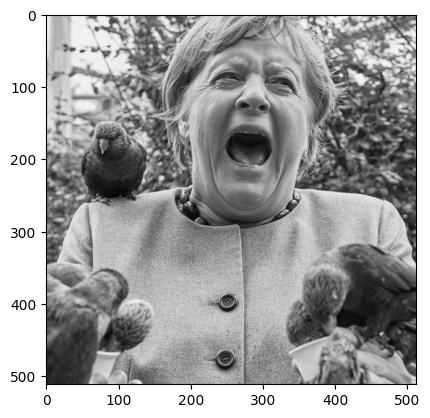

In [10]:
def rgb2gray(rgb):
    #rgb (red, geen, blue) to gray function
    
    # Extract the red, green, and blue color channels
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    
    # Use the weighted sum formula to convert to grayscale
    # 0.2989, 0.5870, and 0.1140 are the weights for red, green, and blue
    # The weights (0.2989, 0.5870, and 0.1140) correspond to how much each color 
    # contributes to the perceived brightness in a grayscale image. 
    # These weights reflect the human eye's sensitivity to different color.
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    
    # Return the grayscale image as 8-bit unsigned integers (values between 0 and 255)
    return np.uint8(gray)

# Read image
img = mpimg.imread("./images/Angela.jpg")
# Use function to convert to grey
gray =rgb2gray(img)

# To display scalar images, imshow uses a colormap (cmap)
plt.imshow(gray,cmap='gray')
plt.show()

## Exercice 1
We'll define a 2D convolution which applies convolution with kernel H on X. The result of the convolution is of the same form as X. Pay attention to how we treat the edge case.

In [11]:
# Method 1
def convolution2D(X,H):
    # Initialize an empty array 'res' with the same shape as the input X
    res = np.empty_like(X) 
    
    # Ensure 'res' is filled with zeros to avoid any uninitialized values
    res = np.zeros(X.shape)
    
    # A counter (for debugging purposes) to track how many times the boundary condition is used
    cout = 0
    
    # Loop over each element (pixel) of the input image X
    for m in range(X.shape[0]):  # Loop through rows
        for n in range(X.shape[1]):  # Loop through columns
            
            # Temporary variable to accumulate convolution result for the current pixel
            temp = 0
            
            # Loop over each element of the convolution kernel H
            for i in range(H.shape[0]):  # Loop through kernel rows
                for j in range(H.shape[1]):  # Loop through kernel columns
                    
                    # Calculate the index shift for handling the center of the kernel
                    if (m+(-H.shape[0]//2+i)<0 or n+(-H.shape[1]//2+j)<0 or 
                        m+(-H.shape[0]//2+i)>=X.shape[0] or n+(-H.shape[1]//2+j)>=X.shape[1]):
                        
                        # If the kernel extends beyond the edge of the image, use the current pixel value
                        temp += X[m,n]
                        cout += 1  # Increment counter for how often boundary cases are used
                        
                    else:
                        # Apply the convolution by multiplying the corresponding kernel value with the shifted image value
                        temp += H[i,j] * X[m+(-H.shape[0]//2+i), n+(-H.shape[1]//2+j)]
            
            # Assign the result to the corresponding position in the result matrix
            res[m,n] = temp
    
    # Print the number of times boundary cases were handled (for debugging)
    print(cout)
    
    # Return the resulting matrix after applying the convolution
    return res

# Method 2
def convo2(X,H):
    # Initialize an empty result array with the same shape as X
    res = np.empty_like(X)
    
    # Ensure 'res' is filled with zeros to avoid any uninitialized values
    res = np.zeros(X.shape)
    
    # Iterate over all valid positions where the kernel H fits into the input image X
    # The loop ensures we don't go out of bounds (X.shape[0] - H.shape[0] + 1)
    for i in range(X.shape[0]-H.shape[0]+1):  # Loop through rows where the kernel fits
        for j in range(X.shape[1]-H.shape[1]+1):  # Loop through columns where the kernel fits
            
            # Extract a sub-matrix from X that has the same shape as the kernel H
            sub_matrix = X[i:i+H.shape[0], j:j+H.shape[1]]
            
            # Perform element-wise multiplication between the sub-matrix and the kernel,
            # and then sum all the elements. Store the result in the corresponding position in 'res'
            res[i,j] = np.sum(sub_matrix * H)
    
    # Return the resulting matrix after applying the convolution
    return res



Try finding the difference between the two methods above in your free time.

You will find several types of kernel to apply on the image. You can also combine several convolutions one after the other. Don't hesitate to invent some or look for common kernels on the net.

9207


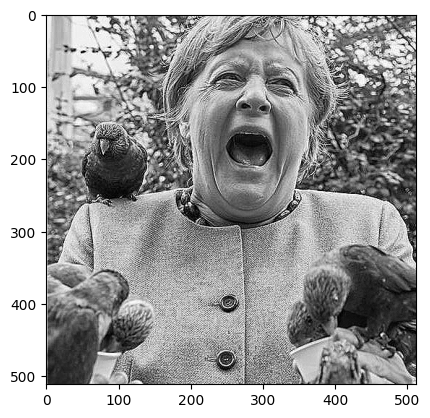

In [14]:
# Some common convolution operations 
H=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]) #sharpening
# H=np.ones((3,3))*1.0/9 #blur
#H=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) #edge detection

res = convolution2D(gray, H)
#res = convo2(gray,H)

# np.clip allows to crop the values of the array between [0,255]
# which is the range of possible values for pixels
res = np.clip(res, 0, 255)

plt.imshow(res, cmap='gray')
plt.show()

## Binarization
The binarization of an image is to produce an image whose pixels are Booleans. We usually start with an input image and apply a condition on each pixel. The goal is to isolate the object of interest from the image and to obtain **True** pixels for the pixels that belong to it (foreground) and **False** pixels for the pixels of the background.

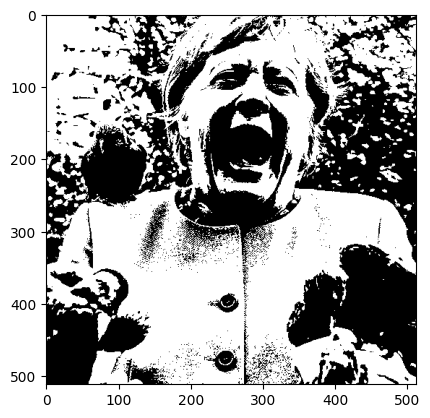

In [17]:
img = mpimg.imread("./images/Angela.jpg")
gray =rgb2gray(img)

# numpy magic !
bin = gray > 128

plt.imshow(bin, cmap='gray')
plt.show()

A binarized image can contain True and False but also 0 and 1 or 0 and 255. We will see later that OpenCV doesn't like boolean images very much and that you will have to convert them into 8-bit unsigned integers.

In [18]:
bin = np.uint8(bin)

## Color selection
A common way to binarize is to select a particular color in the image. Beware that two colors visually close are sometimes not very close in RGB space. It is generally recommended to switch to HSV to perform this kind of operation.

In [19]:
img = mpimg.imread("./images/nemo.jpg")

hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

#### Exercise 2: select Nemo's color
Use OpenCV's inRange function to select the red color of the image nemo.jpg.

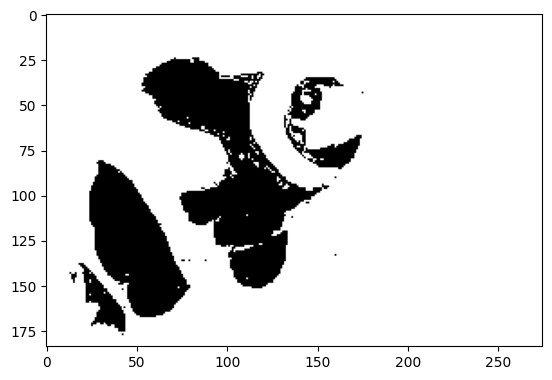

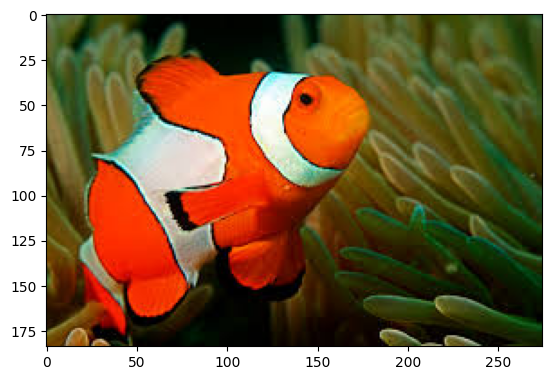

In [22]:
# The function 'cv2.inRange()' creates a mask based on the range of color in the HSV color space.
# 'hsv_img' is an image in the HSV color space (Hue, Saturation, Value).
# The function will return a binary mask where:
# - Pixels that fall within the range [0, 100, 100] to [10, 255, 255] (low to high HSV values) will be set to 255 (white),
# - Pixels outside this range will be set to 0 (black).
result = cv2.inRange(hsv_img, np.array([0,100,100]), np.array([10,255,255]))

# '255 - result' inverts the mask, changing white (255) to black (0), and black (0) to white (255).
# This allows us to highlight the areas that do NOT match the selected color range.
res = (255 - result)

# Display the inverted mask (res) using Matplotlib with a grayscale colormap ('cmap="gray"').
# This shows where the colors that fall outside the specified range are located (they will appear white).
plt.imshow(res, cmap="gray")
plt.show()

# Display the original image ('img'), which was processed earlier, to show the context of the color selection.
plt.imshow(img)
plt.show()


## Labeling

Labeling consists in marking each group of contiguous pixels of the foreground with an integer label. The goal is to be able to apply a treatment to each detected object.

The **connectedComponents** function of OpenCV allows to perform a labeling.

#### Exercise 3

How many distinct red areas do you get for the image nemo.jpg ?

In [26]:
num_labels, labels_im = cv2.connectedComponents(result,connectivity=8)
print(num_labels)

18


#### Exercise 4

We have to many small pixels that were counted as spots.
Remove the noise from your binarization of nemo.jpg before recounting the red areas.

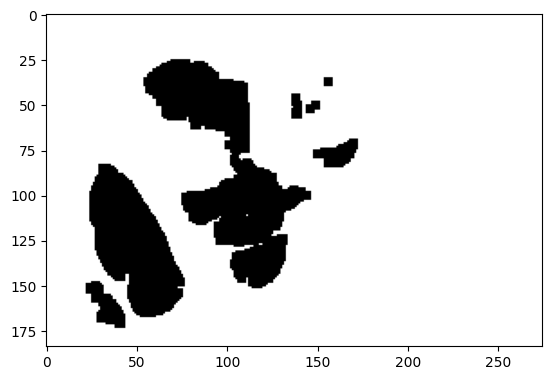

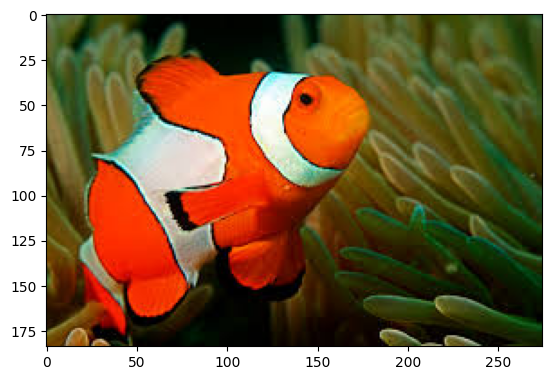

8


In [25]:
# Step 1: Create a kernel for morphological operations. Our convolution operation !!
# The kernel is a 5x5 matrix filled with ones, of data type uint8 (unsigned 8-bit integers).
# This kernel will be used for the 'opening' morphological operation, which removes noise.
kernel = np.ones((5,5),np.uint8)

# Step 2: Apply morphological 'opening' to remove noise.
# 'Opening' is an operation that first applies erosion (shrinking white regions) followed by dilation (expanding them again).
# It is useful for removing small white noise (i.e., small bright spots) from binary images.
# 'cv2.MORPH_OPEN' specifies that we are using the 'opening' operation.
opening = cv2.morphologyEx(result, cv2.MORPH_OPEN, kernel)

# Step 3: Invert the result of the 'opening' operation.
# Similar to the previous example, this will change white areas to black and black areas to white.
# This helps highlight areas that were not affected by the noise removal.
res = (255 - opening)

# Step 4: Display the inverted result (res) in grayscale.
# This shows the result after noise removal, with areas that were considered noise turned black.
plt.imshow(res, cmap="gray")
plt.show()

# Step 5: Display the original image (img).
# This provides context for the original image before any noise removal or processing.
plt.imshow(img)
plt.show()

# Step 6: Perform connected component labeling.
# This function labels all connected components (contiguous regions of white pixels) in the binary image.
# 'connectivity=8' means it considers 8 neighboring pixels (horizontal, vertical, and diagonal) to be connected.
num_labels, labels_im = cv2.connectedComponents(opening, connectivity=8)

# Step 7: Print the number of labels (connected components).
# 'num_labels' is the number of unique connected components detected, including the background.
print(num_labels)


# Challenge !

In pairs of two, it is now time that you try to count your money. Write the code to inspect the image coins.jpg in the images folder. Find how much money you have left, can you buy lunch or should you ask for a promotion ? Be quicker then the other !